In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring Banned Account Tweets first

In [2]:
venezuela_tweets = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Examine features of Dataframe
venezuela_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569455 entries, 0 to 569454
Data columns (total 31 columns):
tweetid                     569455 non-null int64
userid                      569455 non-null object
user_display_name           569455 non-null object
user_screen_name            569455 non-null object
user_reported_location      261836 non-null object
user_profile_description    526220 non-null object
user_profile_url            486822 non-null object
follower_count              569455 non-null int64
following_count             569455 non-null int64
account_creation_date       569455 non-null object
account_language            569455 non-null object
tweet_language              568701 non-null object
tweet_text                  569455 non-null object
tweet_time                  569455 non-null object
tweet_client_name           569455 non-null object
in_reply_to_userid          171 non-null float64
in_reply_to_tweetid         125 non-null float64
quoted_tweet_tweetid        3

In [4]:
#checkout how many unique users there are
venezuela_tweets.user_screen_name.nunique()

33

In [5]:
# Feature engineer to see how many times name 'Trump' appears in Tweets
venezuela_tweets['Trump_in_Tweet'] = venezuela_tweets.tweet_text.apply(lambda x: 'trump' in x.lower())
venezuela_tweets.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,Trump_in_Tweet
0,841279580644171777,828668571765133317,TRUMP TRAIN 🚂,TRUMPTRAIN_17,"Texas, USA",Lets help @realDonaldTrump Make America Great ...,https://t.co/ZkpEZdjz6R,5059,4718,2017-02-06,...,absent,0,0,0,1,[],['http://USA.TrumpNewss.com/63V'],[],NaN,False
1,933065474744684544,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,0,0,0,1,[],['http://zpr.io/nG7gc'],[],NaN,False
2,1020373357144018945,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,0,1,7,4,[],['http://zpr.io/6xjYq'],[],NaN,False
3,927862406268751872,896121971989262336,Emma🌺| Reporter👩‍💻,EmmaTurnerBN,NaN,YUGE Trump Supporter since the day Trump annou...,https://t.co/vC8RybJYHo,34770,32618,2017-08-11,...,absent,0,0,1,1,[],['http://zpr.io/nRxP4'],[],NaN,False
4,845268272664633345,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,0,1,2,1,[],['http://POTUS.TrumpNewss.com/Nnl'],[],NaN,False


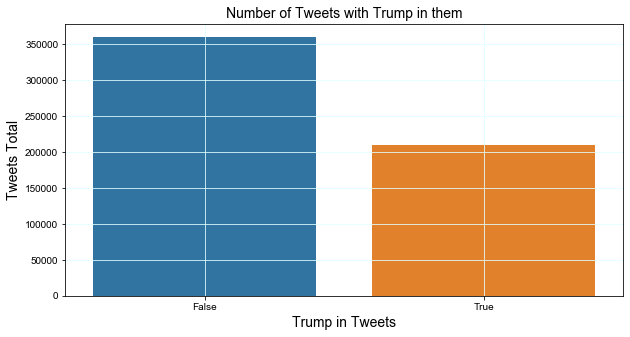

In [6]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Trump_in_Tweet', data=venezuela_tweets)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Trump in Tweets', fontsize = 14)
plt.title('Number of Tweets with Trump in them', fontsize = 14)
plt.grid(c = 'lightcyan')

plt.show ()

In [10]:
#The name Trump is in about 1/3 tweets
venezuela_tweets.Trump_in_Tweet.value_counts()


False    359767
True     209688
Name: Trump_in_Tweet, dtype: int64

In [13]:
total = 209688 + 359767
# Trump_in_Tweets = total/209688
209688/ total


0.3682257597176247

In [15]:
### Organize a DF of just Retweets
retweets_mask = venezuela_tweets['is_retweet'] == True
retweets = venezuela_tweets[retweets_mask]

# Organize a DF of just Tweets
tweets_mask = venezuela_tweets['is_retweet'] == False
tweets = venezuela_tweets[tweets_mask]


# tweets_english = tweets[tweets['account_language'] == 'en']
# retweets_english = retweets[retweets['account_language'] == 'en'

### Checking registered Account Language of Banned Accounts against actual Language in Tweets

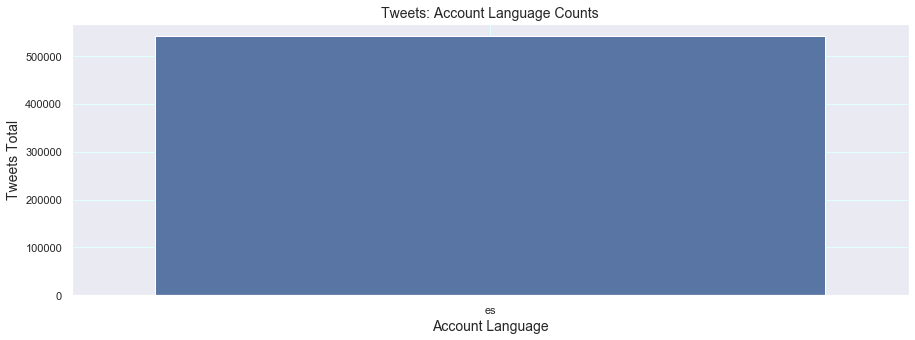

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='account_language', data=tweets)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Tweets: Account Language Counts', fontsize = 14)
plt.grid(c = 'lightcyan')

        
plt.show ()

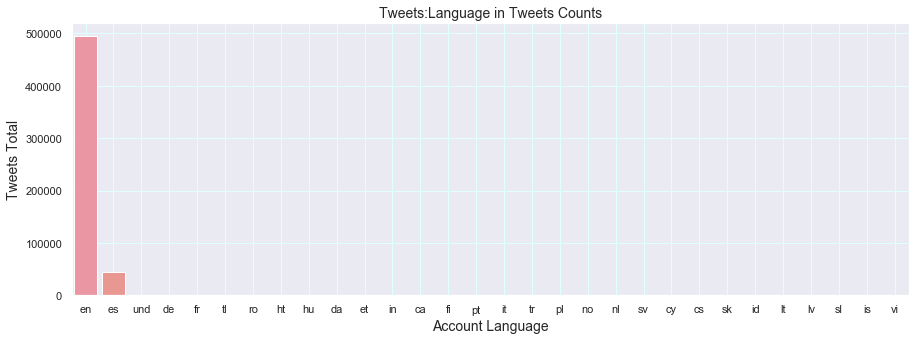

In [17]:
        # Language in Tweet body

plt.figure(figsize=(15,5))
ax = sns.countplot(x='tweet_language', data=tweets)
sns.set(style='darkgrid')
        
plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Tweets:Language in Tweets Counts', fontsize = 14)
plt.grid(c = 'lightcyan')
        
plt.show ()

### Fishy Fishy.. It appears although all accounts are registered as Spanish Language. Language is overwhelmnighly English 

# On to exploring CSV of Venezuelan users

In [19]:
venezuela_users = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_users_csv_hashed.csv')


In [20]:
#Less features in users CSV file
venezuela_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
userid                      33 non-null object
user_display_name           33 non-null object
user_screen_name            33 non-null object
user_reported_location      18 non-null object
user_profile_description    31 non-null object
user_profile_url            25 non-null object
follower_count              33 non-null int64
following_count             33 non-null int64
account_creation_date       33 non-null object
account_language            33 non-null object
dtypes: int64(2), object(8)
memory usage: 2.7+ KB


In [21]:
# Exact same Users however
venezuela_users.user_screen_name.nunique()

33

## Time to see how popular these users are (how many followers)

In [22]:
venezuela_users.follower_count.sort_values()

29        0
24      146
8      1357
23     1561
1      3716
27     4045
19     4848
6      5059
21     5589
32     7366
10     8895
16     9032
13     9828
20     9980
28    10669
0     13184
15    14036
4     15246
31    17055
18    19806
26    19865
30    20176
22    20661
12    23494
14    24198
9     34770
17    40710
25    44020
3     47083
11    54778
7     57618
2     61537
5     64717
Name: follower_count, dtype: int64

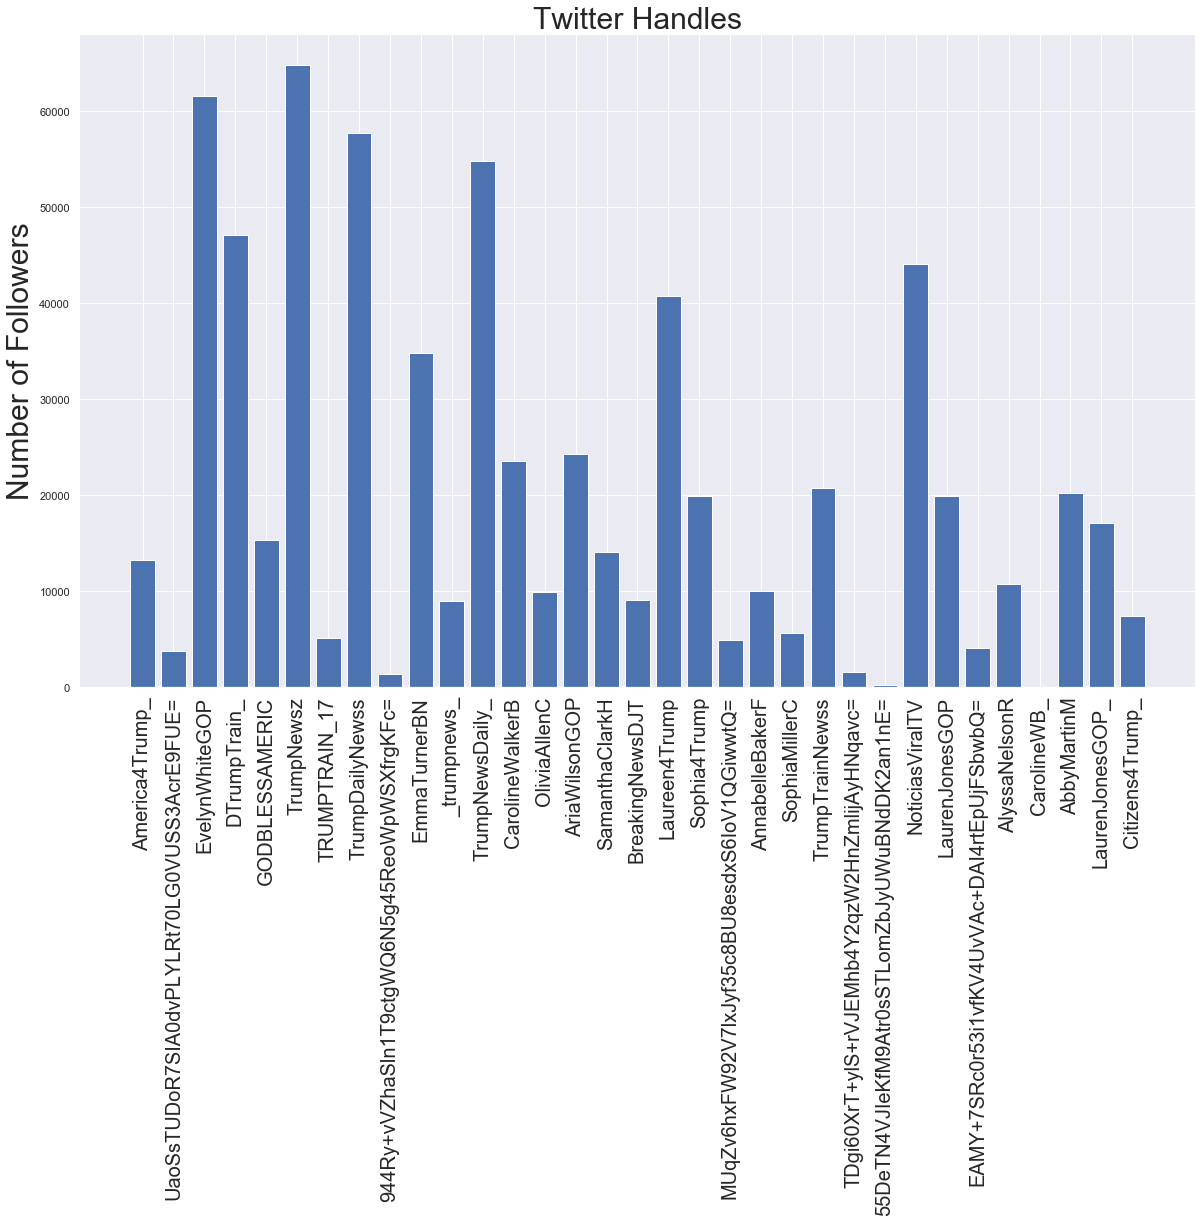

In [23]:
plt.figure(figsize=(20, 12))
ax = plt.subplot()
plt.bar(range(len(venezuela_users)),
        venezuela_users.follower_count)
ax.set_xticks(range(len(venezuela_users.user_display_name)))
ax.set_xticklabels(venezuela_users.user_screen_name.values,rotation=90,size=20)
plt.ylabel('Number of Followers',size=30)
plt.title('Twitter Handles',size=30)
plt.show()

# Now lets see where the Banned foreign actor accounts are 'located'

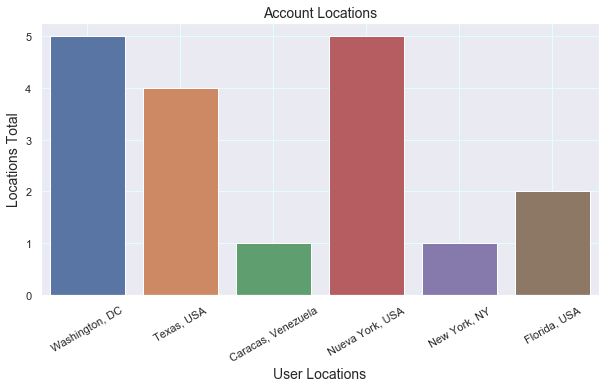

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='user_reported_location', data=venezuela_users)
sns.set(style="dark")

plt.ylabel('Locations Total', fontsize = 14)
plt.xlabel('User Locations', fontsize = 14)
plt.title('Account Locations', fontsize = 14)
plt.grid(c = 'lightcyan')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

        
plt.show ()